In [1]:
# the usual suspects
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
from pandas import DataFrame, Grouper
%matplotlib inline

In [2]:
# time series plot of TMAX
# the "squeeze=True" argument loads this as a series instead of a dataframe
# the "parse_dates=True" argument converts the 'DATE' to a date which will cause
# pandas to create the index as a date_index, needed for date grouping later
series_tmax = pd.read_csv('data/5YDailyObsDekalbAIrport - 2651287.csv', 
                          usecols=['DATE','TMAX'], 
                          index_col='DATE',
                          parse_dates=True,
                          squeeze=True)
series_tmax.index.dtype
# for my purposes'<M8[ns]' is the same as 'datetime64'

dtype('<M8[ns]')

In [3]:
series_tmax.tail()

DATE
2021-07-07    87.0
2021-07-08    85.0
2021-07-09    88.0
2021-07-10    83.0
2021-07-11    87.0
Name: TMAX, dtype: float64

<AxesSubplot:xlabel='DATE'>

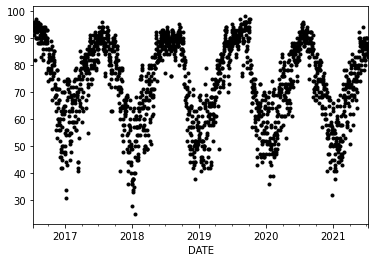

In [4]:
series_tmax.plot(style="k.")
# pyplot.show()

In [6]:
# fill out partial years
idx=pd.date_range('2016-01-01', '2021-12-31')
series_tmax_pad = series_tmax.reindex(idx)

# ignore leap_days so that each annual series will each have the same number of elements
series_tmax_pad = series_tmax_pad[~((series_tmax_pad.index.month==2) & (series_tmax_pad.index.day==29))]
series_tmax_pad.head()

2016-01-01   NaN
2016-01-02   NaN
2016-01-03   NaN
2016-01-04   NaN
2016-01-05   NaN
Name: TMAX, dtype: float64

<AxesSubplot:>

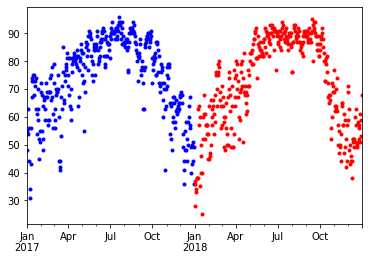

In [7]:
#plot 2017 and 2018 data
series_tmax_pad[series_tmax_pad.index.year==2017].plot(style="b.")
series_tmax_pad[series_tmax_pad.index.year==2018].plot(style="r.")

In [8]:
# create a dataframe with each column a year's worth of data 
groups = series_tmax_pad.groupby(Grouper(freq='A'))
df_years = DataFrame()
for name, group in groups:
    df_years[name.year] = group.values
df_years  
    

,2016,2017,2018,2019,2020,2021
0,NaN,48.0,28.0,64.0,55.0,66.0
1,NaN,55.0,36.0,57.0,47.0,64.0
2,NaN,63.0,37.0,54.0,57.0,53.0
3,NaN,54.0,33.0,64.0,57.0,56.0
4,NaN,56.0,34.0,57.0,51.0,55.0
...,...,...,...,...,...,...
360,70.0,43.0,51.0,64.0,56.0,NaN
361,65.0,44.0,61.0,67.0,57.0,NaN
362,65.0,51.0,59.0,69.0,63.0,NaN
363,50.0,49.0,53.0,68.0,50.0,NaN


<AxesSubplot:>

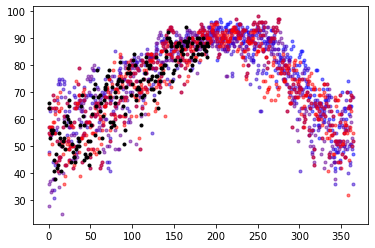

In [9]:
# df_years[2017].plot(style="b.")
df_years[2016].plot(color=(0,0,1,.5), style=".")
df_years[2017].plot(color=(.2,0,.8,.5), style=".")
df_years[2018].plot(color=(.4,0,.6,.5), style=".")
df_years[2019].plot(color=(.6,0,.4,.5), style=".")
df_years[2019].plot(color=(.8,0,.2,.5), style=".")
df_years[2020].plot(color=(1,0,0,.5), style=".")
df_years[2021].plot(color=(0,0,0,), style=".")

# average precipitation (PRCP) vs 2021 precip to date

In [10]:
s_precip = pd.read_csv('data/5YDailyObsDekalbAIrport - 2651287.csv', 
                        usecols=['DATE','PRCP'], 
                        index_col='DATE',
                        parse_dates=True,
                        squeeze=True)

# fill out partial years
idx=pd.date_range('2016-01-01', '2021-12-31')
s_precip = s_precip.reindex(idx)

# ignore leap_days so that each annual series will each have the same number of elements
s_precip = s_precip[~((s_precip.index.month==2) & (s_precip.index.day==29))]
s_precip.head()

2016-01-01   NaN
2016-01-02   NaN
2016-01-03   NaN
2016-01-04   NaN
2016-01-05   NaN
Name: PRCP, dtype: float64

In [11]:
# create a dataframe with each column a year's worth of data 
s_groups = s_precip.groupby(Grouper(freq='A'))
gb = s_groups.groups
print(gb)

{Timestamp('2016-12-31 00:00:00', freq='A-DEC'): 365, Timestamp('2017-12-31 00:00:00', freq='A-DEC'): 730, Timestamp('2018-12-31 00:00:00', freq='A-DEC'): 1095, Timestamp('2019-12-31 00:00:00', freq='A-DEC'): 1460, Timestamp('2020-12-31 00:00:00', freq='A-DEC'): 1825, Timestamp('2021-12-31 00:00:00', freq='A-DEC'): 2190}


In [12]:
df_precip = DataFrame()
for name, group in groups:
    df_precip[name.year] = group.values
df_precip.head()  

,2016,2017,2018,2019,2020,2021
0,NaN,48.0,28.0,64.0,55.0,66.0
1,NaN,55.0,36.0,57.0,47.0,64.0
2,NaN,63.0,37.0,54.0,57.0,53.0
3,NaN,54.0,33.0,64.0,57.0,56.0
4,NaN,56.0,34.0,57.0,51.0,55.0


In [13]:
# calculate the mean precip for years 2016 - 2020
# df[column_list].iloc[row_index_list].mean(axis=0)

df_precip['avg_pre_2021'] = df_precip.drop(2021, axis=1).mean(axis=1)
df_precip


,2016,2017,2018,2019,2020,2021,avg_pre_2021
0,NaN,48.0,28.0,64.0,55.0,66.0,48.75
1,NaN,55.0,36.0,57.0,47.0,64.0,48.75
2,NaN,63.0,37.0,54.0,57.0,53.0,52.75
3,NaN,54.0,33.0,64.0,57.0,56.0,52.00
4,NaN,56.0,34.0,57.0,51.0,55.0,49.50
...,...,...,...,...,...,...,...
360,70.0,43.0,51.0,64.0,56.0,NaN,56.80
361,65.0,44.0,61.0,67.0,57.0,NaN,58.80
362,65.0,51.0,59.0,69.0,63.0,NaN,61.40
363,50.0,49.0,53.0,68.0,50.0,NaN,54.00


<AxesSubplot:>

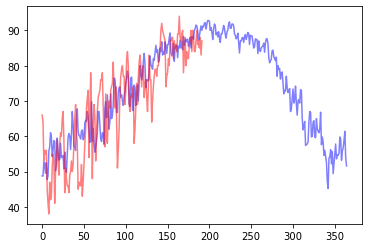

In [14]:
df_precip['avg_pre_2021'].plot(color=(0,0,1,.5))
df_precip[2021].plot(color=(1,0,0,.5))

## try grouping data by month and producing monthly average

In [15]:
s_precip

2016-01-01   NaN
2016-01-02   NaN
2016-01-03   NaN
2016-01-04   NaN
2016-01-05   NaN
              ..
2021-12-27   NaN
2021-12-28   NaN
2021-12-29   NaN
2021-12-30   NaN
2021-12-31   NaN
Name: PRCP, Length: 2190, dtype: float64

In [16]:
df_precip_monthly=s_precip.groupby (by=[s_precip.index.year, s_precip.index.month]).mean()
df_precip_monthly.head(12)

2016  1          NaN
      2          NaN
      3          NaN
      4          NaN
      5          NaN
      6          NaN
      7     0.053000
      8     0.174516
      9     0.100333
      10    0.003548
      11    0.098333
      12    0.095161
Name: PRCP, dtype: float64

In [17]:
df_precip_monthly.loc[2016]

1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7     0.053000
8     0.174516
9     0.100333
10    0.003548
11    0.098333
12    0.095161
Name: PRCP, dtype: float64

In [18]:
years = [2016,2017,2018,2019,2020,2021]
df_precip_annual = DataFrame()
for year in years:
    df_precip_annual[year]= df_precip_monthly.loc[year]
df_precip_annual

,2016,2017,2018,2019,2020,2021
1,NaN,0.183871,0.077742,0.173226,0.253871,0.125484
2,NaN,0.057500,0.180357,0.184286,0.353571,0.139286
3,NaN,0.106774,0.176774,0.091935,0.207097,0.162581
4,NaN,0.199667,0.139333,0.236667,0.162333,0.075333
5,NaN,0.150645,0.186774,0.090000,0.104516,0.240000
6,NaN,0.334333,0.230333,0.163667,0.161667,0.160000
7,0.053000,0.126452,0.241613,0.101290,0.162258,0.250909
8,0.174516,0.201935,0.167097,0.136774,0.244839,NaN
9,0.100333,0.134333,0.039667,0.044667,0.235333,NaN
10,0.003548,0.121613,0.128710,0.138710,0.269355,NaN


<AxesSubplot:>

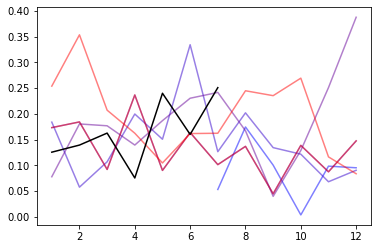

In [19]:
df_precip_annual[2016].plot(color=(0,0,1,.5))
df_precip_annual[2017].plot(color=(.2,0,.8,.5))
df_precip_annual[2018].plot(color=(.4,0,.6,.5))
df_precip_annual[2019].plot(color=(.6,0,.4,.5))
df_precip_annual[2019].plot(color=(.8,0,.2,.5))
df_precip_annual[2020].plot(color=(1,0,0,.5))
df_precip_annual[2021].plot(color=(0,0,0,))

In [20]:
df_precip_annual['pre_2021']= df_precip_annual.drop(2021, axis=1).mean(axis=1)
df_precip_annual

,2016,2017,2018,2019,2020,2021,pre_2021
1,NaN,0.183871,0.077742,0.173226,0.253871,0.125484,0.172177
2,NaN,0.057500,0.180357,0.184286,0.353571,0.139286,0.193929
3,NaN,0.106774,0.176774,0.091935,0.207097,0.162581,0.145645
4,NaN,0.199667,0.139333,0.236667,0.162333,0.075333,0.184500
5,NaN,0.150645,0.186774,0.090000,0.104516,0.240000,0.132984
6,NaN,0.334333,0.230333,0.163667,0.161667,0.160000,0.222500
7,0.053000,0.126452,0.241613,0.101290,0.162258,0.250909,0.136923
8,0.174516,0.201935,0.167097,0.136774,0.244839,NaN,0.185032
9,0.100333,0.134333,0.039667,0.044667,0.235333,NaN,0.110867
10,0.003548,0.121613,0.128710,0.138710,0.269355,NaN,0.132387


<AxesSubplot:>

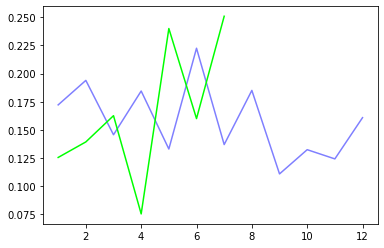

In [21]:
df_precip_annual['pre_2021'].plot(color=(0,0,1,.5))
# df_precip_annual[2016].plot(color=(1,0,0,.5))
#df_precip_annual[2020].plot(color=(0,0,0,))
df_precip_annual[2021].plot(color=(0,1,0,))